Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters found:  {'colsample_bylevel': 0.6, 'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7}
Train Mean Squared Error (MSE): 0.003695213828493527
Test Mean Squared Error (MSE): 0.0036952230197113715
Train Root Mean Squared Error (RMSE): 0.06078827048447362
Test Root Mean Squared Error (RMSE): 0.060788346084684454
Train Mean Absolute Error (MAE): 0.060788270481087085
Test Mean Absolute Error (MAE): 0.06078834608226223
Train R^2 Score: -8974968644.521765
Test R^2 Score: -12547945215.850061


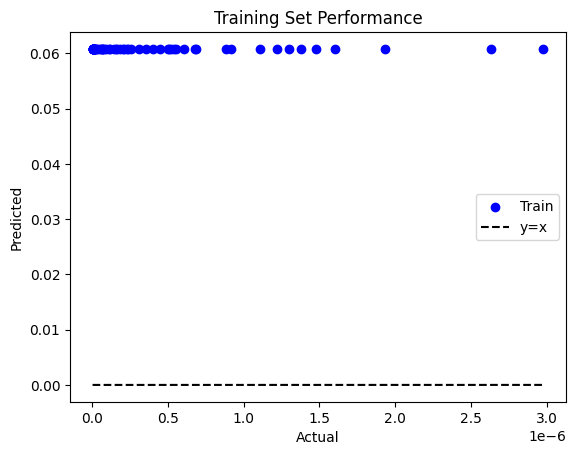

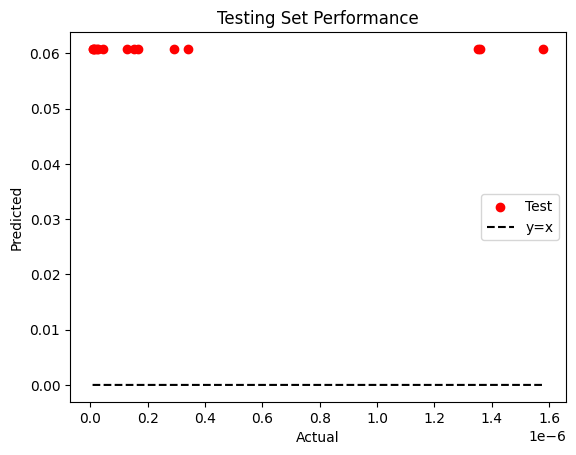

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['target180s'])
y = data['target180s']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# 设置参数范围
param_grid = {
    'n_estimators': [5,20],
    'max_depth': [1,2,3],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.4,0.6],
    'colsample_bylevel': [0.6, 0.7],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}
# 创建XGBoost模型
xgb_model = xgb.XGBRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'xgboost_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


Best parameters found:  {'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Mean Squared Error (MSE): 1.5366383686124574e-14
Test Mean Squared Error (MSE): 6.506939543121004e-15
Train Root Mean Squared Error (RMSE): 1.2396121847628224e-07
Test Root Mean Squared Error (RMSE): 8.066560322170165e-08
Train Mean Absolute Error (MAE): 7.398055886584553e-08
Test Mean Absolute Error (MAE): 5.437304706694272e-08
Train R^2 Score: 0.962677988831231
Test R^2 Score: 0.9779042508446987


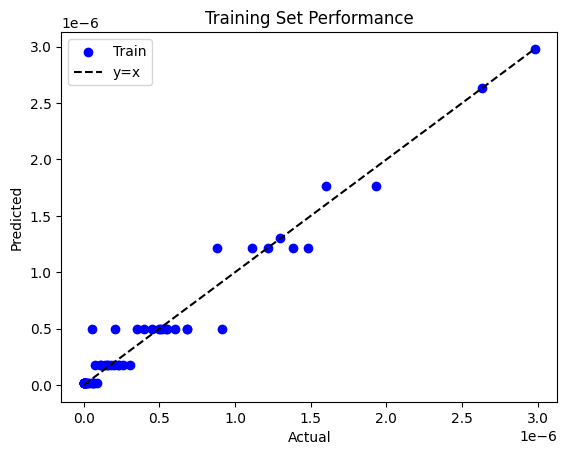

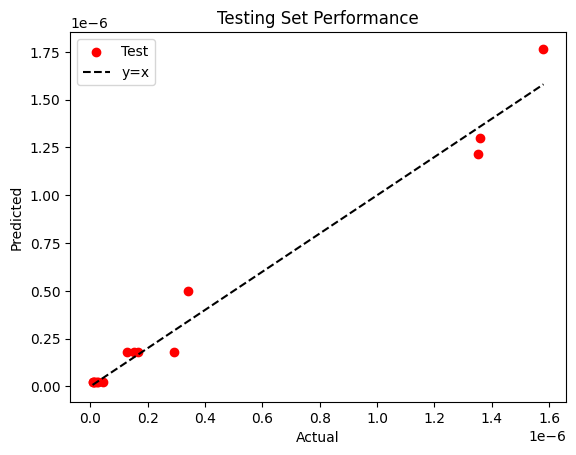

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['target180s'])
y = data['target180s']
# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# 设置参数范围
param_grid = [
    {'max_depth': [1,3,  7,9],
     'min_samples_split': [2, 5, 7],
     'min_samples_leaf': [1, 2, 4],
     'max_features': [None, 'sqrt', 'log2'],
     'criterion': ['mse', 'mae']}
]

# 创建决策树模型
tree_model = DecisionTreeRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型
joblib.dump(best_model, 'decision_tree_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best parameters found:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Train Mean Squared Error (MSE): 2.2102372091118983e-15
Test Mean Squared Error (MSE): 3.1317912174670317e-14
Train Root Mean Squared Error (RMSE): 4.701315995667488e-08
Test Root Mean Squared Error (RMSE): 1.7696867568773383e-07
Train Mean Absolute Error (MAE): 3.208633908492988e-08
Test Mean Absolute Error (MAE): 8.46782941440567e-08
Train R^2 Score: 0.994631755949281
Test R^2 Score: 0.8936531180452054


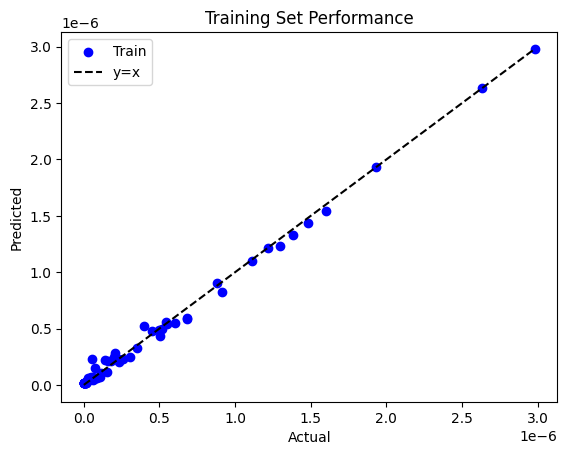

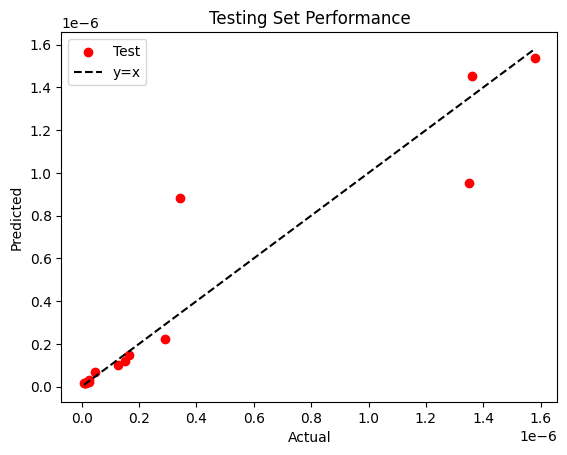

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['target180s'])
y = data['target180s']
# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# 设置参数范围
param_grid = [
    {'n_estimators': [20,40, 60,70,80],
     'max_depth': [3,4, 5, 6,7,8],
     'min_samples_split': [2, 5, 7,10],
     'min_samples_leaf': [1, 2, 4],
     'max_features': [None, 'sqrt', 'log2']}
]

# 创建Extra Trees模型
extra_trees_model = ExtraTreesRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=extra_trees_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'extra_trees_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters found:  {'C': 0.01, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'}
Train Mean Squared Error (MSE): 1.506555702437939e-12
Test Mean Squared Error (MSE): 1.5681147708401037e-12
Train Root Mean Squared Error (RMSE): 1.227418307846978e-06
Test Root Mean Squared Error (RMSE): 1.2522438943113691e-06
Train Mean Absolute Error (MAE): 1.1422153389771942e-06
Test Mean Absolute Error (MAE): 1.1873892666607948e-06
Train R^2 Score: -2.6597463407900372
Test R^2 Score: -4.335595071646188


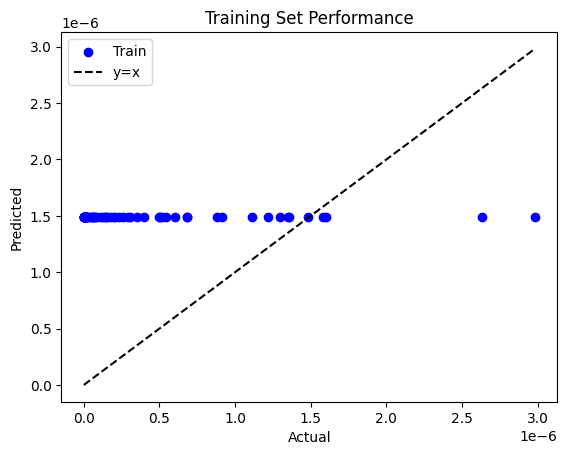

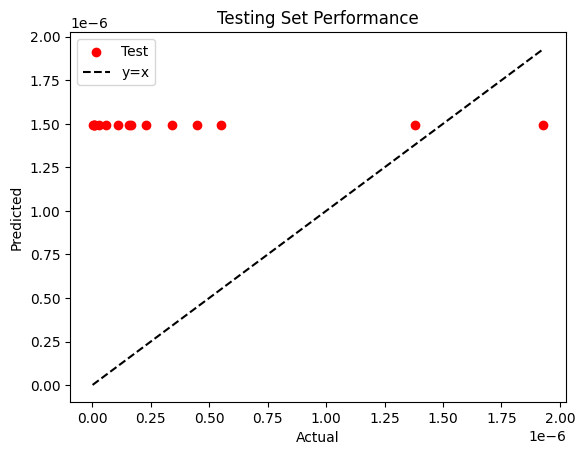

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['target180s'])
y = data['target180s']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 设置参数范围
param_grid = [
    {'kernel': ['linear', 'rbf', 'poly'],
     'C': [0.01,0.1,0.2, 1, 10],
     'gamma': ['scale', 'auto'],
     'epsilon': [0.1, 0.2, 0.3,0.35,0.4]}
]

# 创建SVM模型
svm_model = SVR()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'svm_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\anaconda\envs\py39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Train Mean Squared Error (MSE): 1.733292877045022e-14
Test Mean Squared Error (MSE): 9.919300818910551e-15
Train Root Mean Squared Error (RMSE): 1.3165458127406816e-07
Test Root Mean Squared Error (RMSE): 9.959568674852617e-08
Train Mean Absolute Error (MAE): 7.980409217870996e-08
Test Mean Absolute Error (MAE): 6.335489849295351e-08
Train R^2 Score: 0.9579016264091886
Test R^2 Score: 0.9663168251006221


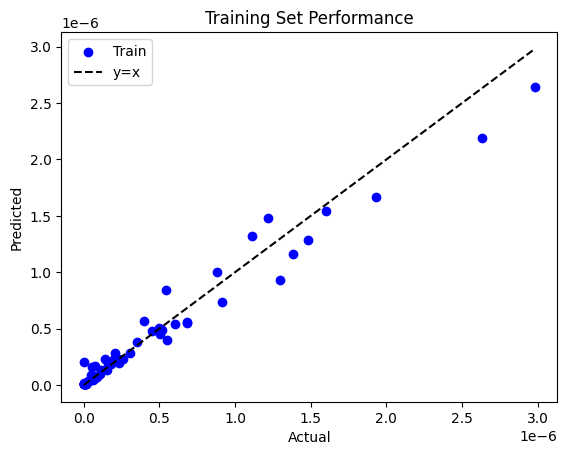

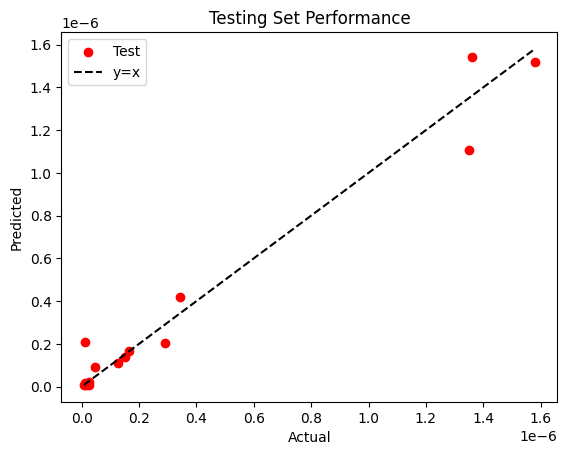

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

# 读取CSV文件
data = pd.read_csv('C:\\Users\\sy\\Desktop\\data_rfe20.csv')

# 数据预处理（根据实际情况进行调整）
X = data.drop(columns=['target180s'])
y = data['target180s']

# 数据归一化处理
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)

# 将归一化后的数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# 设置参数范围
param_grid = [
    {'n_estimators': [20,30,50, 100],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'max_features': ['auto', 'sqrt', 'log2']}
]

# 创建随机森林模型
random_forest_model = RandomForestRegressor()

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 计算训练集上的均方误差（MSE）
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error (MSE):", train_mse)

# 计算测试集上的均方误差（MSE）
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error (MSE):", test_mse)

# 计算训练集上的均方根误差（RMSE）
train_rmse = np.sqrt(train_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

# 计算测试集上的均方根误差（RMSE）
test_rmse = np.sqrt(test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)

# 计算训练集上的平均绝对误差（MAE）
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train Mean Absolute Error (MAE):", train_mae)

# 计算测试集上的平均绝对误差（MAE）
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test Mean Absolute Error (MAE):", test_mae)

# 计算训练集上的 R^2 分数
train_r2 = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_r2)

# 计算测试集上的 R^2 分数
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_r2)

# 保存模型为 .dat 文件
joblib.dump(best_model, 'random_forest_model.dat')

# 绘制训练集的预测图像
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set Performance")
plt.legend()
plt.show()

# 绘制测试集的预测图像
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='y=x')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set Performance")
plt.legend()
plt.show()
